In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
import seaborn as sns
import datetime as dt
import os
import geopandas as gpd
os.getcwd()

'/Users/miek/Documents/DS4B/DS4BThesisSNCB'

In [219]:
# read in data
belgium = gpd.read_file("./data/belgium.json", index_col = 0)
belgium_provinces = gpd.read_file("./data/BELGIUM_-_Provinces.geojson", index_col = 0)


punct2019_1 = pd.read_csv("./data/Punctuality_2019_part1.csv", sep = ";")
punct2019_2 = pd.read_csv("./data/Punctuality_2019_part2.csv", sep = ";")
punct2020_1 = pd.read_csv("./data/Punctuality_2020_part1.csv", sep = ";")
punct2020_2 = pd.read_csv("./data/Punctuality_2020_part2.csv", sep = ";")
punct2021_1 = pd.read_csv("./data/Punctuality_2021_part1.csv", sep = ";")
punct2021_2 = pd.read_csv("./data/Punctuality_2021_part2.csv", sep = ";")
punct2022_1 = pd.read_csv("./data/Punctuality_2022_part1.csv", sep = ";")
punct2022_2 = pd.read_csv("./data/Punctuality_2022_part2.csv", sep = ";")
punct2023 = pd.read_csv("./data/Punctuality_2023.csv", sep = ";")

# combine
all_punct = pd.concat([punct2019_1, punct2019_2, punct2020_1, punct2020_2, punct2021_1, punct2021_2, punct2022_1, punct2022_2, punct2023], axis = 0)

# remove observations that have negative Retard_1pointage (early)
all_punct = all_punct[all_punct['Retard_1pointage'] > 0]

# create year var
all_punct['DAT_DEP'] = pd.to_datetime(all_punct['DAT_DEP'])
all_punct['YEAR_DEP'] = all_punct['DAT_DEP'].apply(lambda x: x.year)

all_punct

/Users/miek/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '17/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/miek/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '15/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/miek/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '16/02/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/miek/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '15/04/2019' in

,TRAIN_ID,DAT_DEP,Retard_1pointage,PTCAR_1pointage,Retard_2pointage,PTCAR_2pointage,NAT_RGE,TRAIN_NUMBER,Retard_1pointage_valeur,Retard_2pointage_valeur,Validite_1pointage,Validite_2pointage,NB,Score,ScorePonctu,YEAR_DEP
0,23052929.0,2019-03-17,72.0,936.0,NaN,NaN,,5689.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2019
1,23598801.0,2019-06-15,63.0,936.0,NaN,NaN,,5685.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2019
3,23377845.0,2019-09-05,122.0,936.0,NaN,NaN,,5683.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2019
4,22891694.0,2019-02-16,101.0,936.0,NaN,NaN,,5692.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2019
5,22623296.0,2019-01-01,7.0,936.0,NaN,NaN,,5680.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310406,31973743.0,2023-08-02,82.0,318.0,NaN,NaN,,1587.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2023
310407,31974711.0,2023-08-02,13.0,455.0,NaN,NaN,,4127.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2023
310408,31974900.0,2023-08-02,289.0,1223.0,NaN,NaN,,4579.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2023
310409,31975122.0,2023-08-02,124.0,1106.0,NaN,NaN,,5818.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2023


In [220]:
with pd.option_context('display.float_format', '{:.0f}'.format):
    print(all_punct.describe())

       TRAIN_ID  Retard_1pointage  PTCAR_1pointage  Retard_2pointage  \
count   3328476           3328476          3328476            603093   
mean   27491687               189              584               152   
std     2907956               340              398               392   
min    22622175                 1                6            -86716   
25%    24829510                36              221                -6   
50%    27396817                89              611                58   
75%    30109322               205              868               178   
max    32345550             30138             2133             14827   

       PTCAR_2pointage  TRAIN_NUMBER  Retard_1pointage_valeur  \
count           603093       3328476                  3328476   
mean               220          4203                        1   
std                  0          2941                        0   
min                215            23                        0   
25%                220    

In [221]:
# read in ptcar data
ptcar = pd.read_csv("./data/PTCAR.csv", sep = ";")
ptcar

,REF_PTCAR_NO,SYMBOLIC_NAME,GPS_LATITUDE,GPS_LONGITUDE,LONG_NAME_FR,LONG_NAME_NL,SHORT_NAME_FR,SHORT_NAME_NL,UIC_CODE,CLASSIFICATION
0,5,YFLVM,50.895468,4.712534,Y.LEUVEN-BUNDEL M,Y.LEUVEN-BUNDEL M,Y.LEUVEN-M,Y.LEUVEN-M,37135,5
1,6,FLS,50.943053,4.038586,AALST,AALST,AALST,AALST,95000,1
2,7,FLSO,50.936352,4.048932,AALST-OOST,AALST-OOST,AALST-OOST,AALST-OOST,95109,3
3,8,FLT,51.092258,3.447856,AALTER,AALTER,AALTER,AALTER,91140,2
4,9,FRST,50.984408,4.824036,AARSCHOT,AARSCHOT,AARSCHOT,AARSCHOT,33209,2
...,...,...,...,...,...,...,...,...,...,...
1307,2134,2134,50.970733,3.854077,LIJN 50A-SEINEN 394,LIJN 50A-SEINEN 394,L50A-S394,L50A-S394,98541,9
1308,2135,2135,51.008208,3.773216,LIJN 50A-SEINEN 467,LIJN 50A-SEINEN 467,L50A-S467,L50A-S467,98558,9
1309,2136,2136,50.888140,4.096512,LIJN 50A-SEINEN 203,LIJN 50A-SEINEN 203,L50A-S203,L50A-S203,98566,9
1310,2141,MSG,49.552220,5.638610,SIGNEULX,SIGNEULX,SIGNEULX,SIGNEULX,66415,10


In [222]:
all_punct

,TRAIN_ID,DAT_DEP,Retard_1pointage,PTCAR_1pointage,Retard_2pointage,PTCAR_2pointage,NAT_RGE,TRAIN_NUMBER,Retard_1pointage_valeur,Retard_2pointage_valeur,Validite_1pointage,Validite_2pointage,NB,Score,ScorePonctu,YEAR_DEP
0,23052929.0,2019-03-17,72.0,936.0,NaN,NaN,,5689.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2019
1,23598801.0,2019-06-15,63.0,936.0,NaN,NaN,,5685.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2019
3,23377845.0,2019-09-05,122.0,936.0,NaN,NaN,,5683.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2019
4,22891694.0,2019-02-16,101.0,936.0,NaN,NaN,,5692.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2019
5,22623296.0,2019-01-01,7.0,936.0,NaN,NaN,,5680.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310406,31973743.0,2023-08-02,82.0,318.0,NaN,NaN,,1587.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2023
310407,31974711.0,2023-08-02,13.0,455.0,NaN,NaN,,4127.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2023
310408,31974900.0,2023-08-02,289.0,1223.0,NaN,NaN,,4579.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2023
310409,31975122.0,2023-08-02,124.0,1106.0,NaN,NaN,,5818.0,1.0,0.0,1.0,0.0,1.0,1.0,100.0,2023


In [223]:
# join to punct based on PTCAR_xpointage the ptcar data
ptcar_merged1 = all_punct.merge(ptcar, left_on='PTCAR_1pointage', right_on='REF_PTCAR_NO', how='left')
ptcar_merged1 = ptcar_merged1.rename(columns={
    'REF_PTCAR_NO': 'REF_PTCAR_NO_x',
    'SYMBOLIC_NAME': 'SYMBOLIC_NAME_x',
    #'GPS_LATITUDE': 'GPS_LATITUDE_x',
    #'GPS_LONGITUDE': 'GPS_LONGITUDE_x',
    'LONG_NAME_FR': 'LONG_NAME_FR_x',
    'LONG_NAME_NL': 'LONG_NAME_NL_x',
    'SHORT_NAME_FR': 'SHORT_NAME_FR_x',
    'SHORT_NAME_NL': 'SHORT_NAME_NL_x',
    'UIC_CODE': 'UIC_CODE_x',
    'CLASSIFICATION': 'CLASSIFICATION_x'
})

ptcar_merged2 = all_punct.dropna(subset=['PTCAR_2pointage']).merge(ptcar, left_on='PTCAR_2pointage', right_on='REF_PTCAR_NO', how='left')
ptcar_merged2 = ptcar_merged2.rename(columns={
    'REF_PTCAR_NO': 'REF_PTCAR_NO_y',
    'SYMBOLIC_NAME': 'SYMBOLIC_NAME_y',
    #'GPS_LATITUDE': 'GPS_LATITUDE_y',
    #'GPS_LONGITUDE': 'GPS_LONGITUDE_y',
    'LONG_NAME_FR': 'LONG_NAME_FR_y',
    'LONG_NAME_NL': 'LONG_NAME_NL_y',
    'SHORT_NAME_FR': 'SHORT_NAME_FR_y',
    'SHORT_NAME_NL': 'SHORT_NAME_NL_y',
    'UIC_CODE': 'UIC_CODE_y',
    'CLASSIFICATION': 'CLASSIFICATION_y'
})


ptcar_merged = pd.concat([ptcar_merged1, ptcar_merged2], axis = 0)
ptcar_merged.columns




Index(['TRAIN_ID', 'DAT_DEP', 'Retard_1pointage', 'PTCAR_1pointage',
       'Retard_2pointage', 'PTCAR_2pointage', 'NAT_RGE', 'TRAIN_NUMBER',
       'Retard_1pointage_valeur', 'Retard_2pointage_valeur',
       'Validite_1pointage', 'Validite_2pointage', 'NB', 'Score',
       'ScorePonctu', 'YEAR_DEP', 'REF_PTCAR_NO_x', 'SYMBOLIC_NAME_x',
       'GPS_LATITUDE', 'GPS_LONGITUDE', 'LONG_NAME_FR_x', 'LONG_NAME_NL_x',
       'SHORT_NAME_FR_x', 'SHORT_NAME_NL_x', 'UIC_CODE_x', 'CLASSIFICATION_x',
       'REF_PTCAR_NO_y', 'SYMBOLIC_NAME_y', 'LONG_NAME_FR_y', 'LONG_NAME_NL_y',
       'SHORT_NAME_FR_y', 'SHORT_NAME_NL_y', 'UIC_CODE_y', 'CLASSIFICATION_y'],
      dtype='object')

## EDA on PTCAR Geodata



In [224]:
# Group by PTCAR
ptcar_agg_first = ptcar_merged.groupby(['PTCAR_1pointage', 'GPS_LATITUDE', 'GPS_LONGITUDE', 'LONG_NAME_NL_x']).agg(mean_delay=('Retard_1pointage', 'mean'),
                                                                                                                       sum=('Retard_1pointage', 'size'))\
                                                                                                                        .reset_index()
ptcar_agg_second = ptcar_merged.groupby(['PTCAR_2pointage', 'GPS_LATITUDE', 'GPS_LONGITUDE', 'LONG_NAME_NL_y']).agg(mean_delay=('Retard_2pointage', 'mean'),
                                                                                                                        sum=('Retard_2pointage', 'size'))\
                                                                                                                        .reset_index()
ptcar_agg_both = pd.concat([ptcar_agg_first, ptcar_agg_second]).reset_index()

In [225]:
data_map= gpd.GeoDataFrame(ptcar_agg_both, geometry=gpd.points_from_xy(ptcar_agg_both.GPS_LONGITUDE, ptcar_agg_both.GPS_LATITUDE))

In [226]:
np.percentile(ptcar_agg_both['mean_delay'], 75)

490.125

In [227]:
ptcar_agg_both['mean_delay'][0]

172.58397825590805

In [228]:
#Set crs to belgium data
data_map.crs = "EPSG:4326"
#Re-project geometries to a projected CRS 
data_map = data_map.to_crs(epsg='3857')

#Set crs to belgium data
belgium_provinces.crs = "EPSG:4326"
#Re-project geometries to a projected CRS 
belgium_provinces = belgium_provinces.to_crs(epsg='3857')





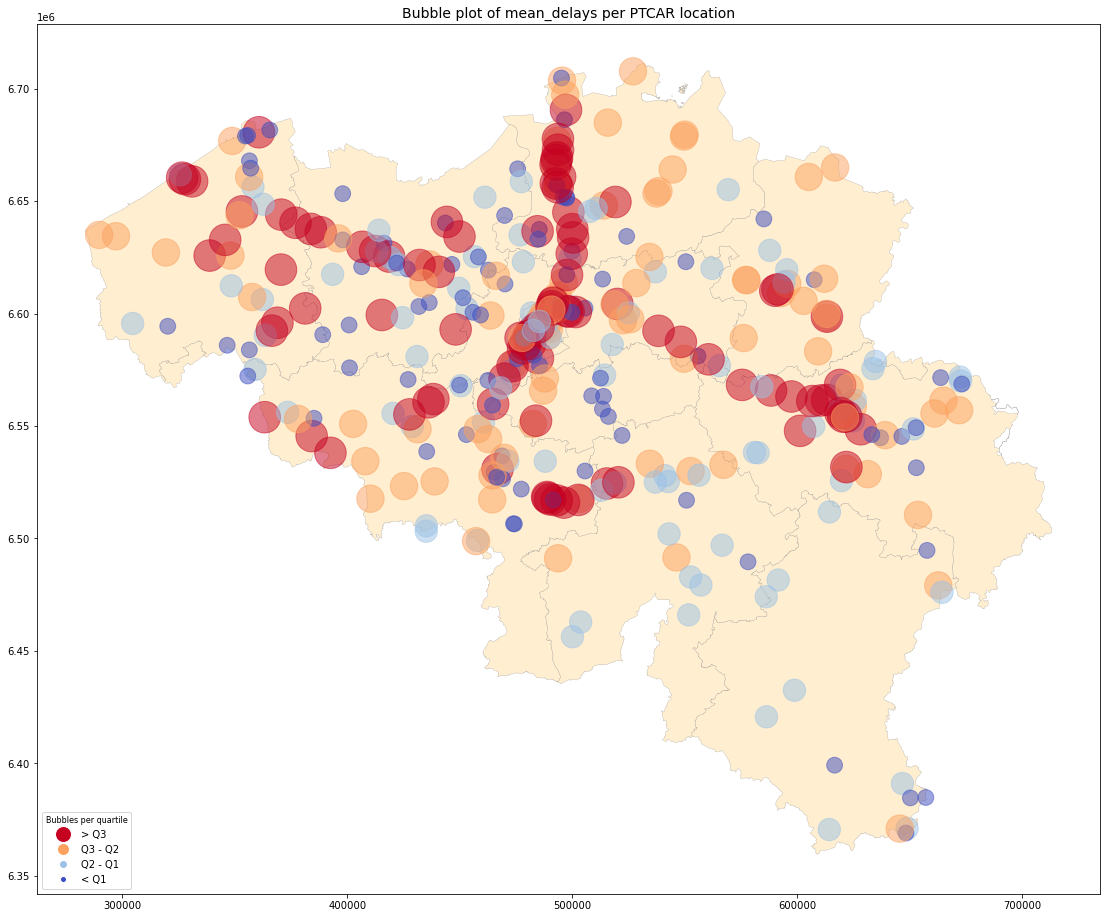

In [229]:

# Draw Geographical distribution of incidents per cancelled trains
# Set color and size for plot
col_station = []
size_station = []
for i in range(0, len(ptcar_agg_both['mean_delay'])):
    if ptcar_agg_both['mean_delay'][i] > np.percentile(ptcar_agg_both['mean_delay'], 75):
        col_station.append('#C50021')
        size_station.append(1000)
    elif (ptcar_agg_both['mean_delay'][i] <= np.percentile(ptcar_agg_both['mean_delay'], 75)) & (ptcar_agg_both['mean_delay'][i] > np.percentile(ptcar_agg_both['mean_delay'], 50)):
        col_station.append('#FCA15E')
        size_station.append(750)
    elif (ptcar_agg_both['mean_delay'][i] <= np.percentile(ptcar_agg_both['mean_delay'], 50)) & (ptcar_agg_both['mean_delay'][i] > np.percentile(ptcar_agg_both['mean_delay'], 25)):
        col_station.append('#9BC2E6')
        size_station.append(500)
    elif ptcar_agg_both['mean_delay'][i] < np.percentile(ptcar_agg_both['mean_delay'], 25):
        col_station.append('#3B4CC0')
        size_station.append(250)

# init plot
fig,ax = plt.subplots(figsize=(24,16))
p1 = belgium_provinces.plot(ax = ax, color = '#ffeecf',edgecolor='grey',linewidth=0.2,zorder=1) #plot belgium map


p2 = data_map.plot(ax = ax, color = col_station, markersize= size_station, zorder=2,alpha = 0.5) #Plot mean_delay per ptcar
ax.set_title('Bubble plot of mean_delays per PTCAR location', fontsize=14)
# Plot legend
legend_element = [Line2D([0], [0], marker='o', color='w', markerfacecolor = '#C50021', markersize=16),
                Line2D([0], [0], marker='o', color='w', markerfacecolor = '#FCA15E',markersize=12),
                Line2D([0], [0], marker='o', color='w', markerfacecolor = '#9BC2E6',markersize=8),
                Line2D([0], [0], marker='o', color='w', markerfacecolor = '#3B4CC0',markersize=6)]
ax.legend(legend_element,['> Q3','Q3 - Q2','Q2 - Q1','< Q1'],\
          title="Bubbles per quartile",title_fontsize=8, loc = 'lower left')
plt.show()

In [268]:
# Let's take a look at differences between the years
# We are most interested in the differences between 2019 and 2022 / 2023.

# Group by PTCAR and year
ptcar_agg_first_years = ptcar_merged.groupby(['PTCAR_1pointage', 'YEAR_DEP', 'GPS_LATITUDE', 'GPS_LONGITUDE', 'LONG_NAME_NL_x']).agg(mean_delay=('Retard_1pointage', 'mean'),
                                                                                                                       sum=('Retard_1pointage', 'size'))\
                                                                                                                        .reset_index()
ptcar_agg_second_years = ptcar_merged.groupby(['PTCAR_2pointage', 'YEAR_DEP', 'GPS_LATITUDE', 'GPS_LONGITUDE', 'LONG_NAME_NL_y']).agg(mean_delay=('Retard_2pointage', 'mean'),
                                                                                                                        sum=('Retard_2pointage', 'size'))\
                                                                                                                        .reset_index()
ptcar_agg_both_years = pd.concat([ptcar_agg_first_years, ptcar_agg_second_years]).reset_index().drop(columns='index')



# make partial 2019 table with only dates before last date-of-year we have in current 2023 table (april 12th)
last_2023_2019_equivalent_date = dt.datetime.strptime('2019-12-04', '%Y-%m-%d')
ptcar2019 = ptcar_merged[(ptcar_merged['YEAR_DEP'] == 2019) & (ptcar_merged['DAT_DEP'] <= last_2023_2019_equivalent_date)]

# Group by PTCAR
ptcar2019_agg_first = ptcar2019.groupby(['PTCAR_1pointage', 'GPS_LATITUDE', 'GPS_LONGITUDE', 'LONG_NAME_NL_x']).agg(mean_delay=('Retard_1pointage', 'mean'),
                                                                                                                       sum=('Retard_1pointage', 'size'))\
                                                                                                                        .reset_index()
ptcar2019_agg_second = ptcar2019.groupby(['PTCAR_2pointage', 'GPS_LATITUDE', 'GPS_LONGITUDE', 'LONG_NAME_NL_y']).agg(mean_delay=('Retard_2pointage', 'mean'),
                                                                                                                        sum=('Retard_2pointage', 'size'))\
                                                                                                                        .reset_index()
ptcar2019_agg_both = pd.concat([ptcar2019_agg_first, ptcar2019_agg_second]).reset_index().drop(columns='index')


ptcar_agg_both_2019 = ptcar_agg_both_years[ptcar_agg_both_years['YEAR_DEP']==2019]
ptcar_agg_both_2019_partial = ptcar2019_agg_both # 2019 but only obs in part of the year that we have for 2023
ptcar_agg_both_2020 = ptcar_agg_both_years[ptcar_agg_both_years['YEAR_DEP']==2020]
ptcar_agg_both_2021 = ptcar_agg_both_years[ptcar_agg_both_years['YEAR_DEP']==2021]
ptcar_agg_both_2022 = ptcar_agg_both_years[ptcar_agg_both_years['YEAR_DEP']==2022]
ptcar_agg_both_2023 = ptcar_agg_both_years[ptcar_agg_both_years['YEAR_DEP']==2023] # incomplete, up to 12th of april

# check
ptcar_agg_both_2023[ptcar_agg_both_2023['PTCAR_1pointage']==13]

,PTCAR_1pointage,YEAR_DEP,GPS_LATITUDE,GPS_LONGITUDE,LONG_NAME_NL_x,mean_delay,sum,PTCAR_2pointage,LONG_NAME_NL_y
16,13.0,2023,51.077288,2.602397,DE PANNE,227.764858,1548,NaN,NaN


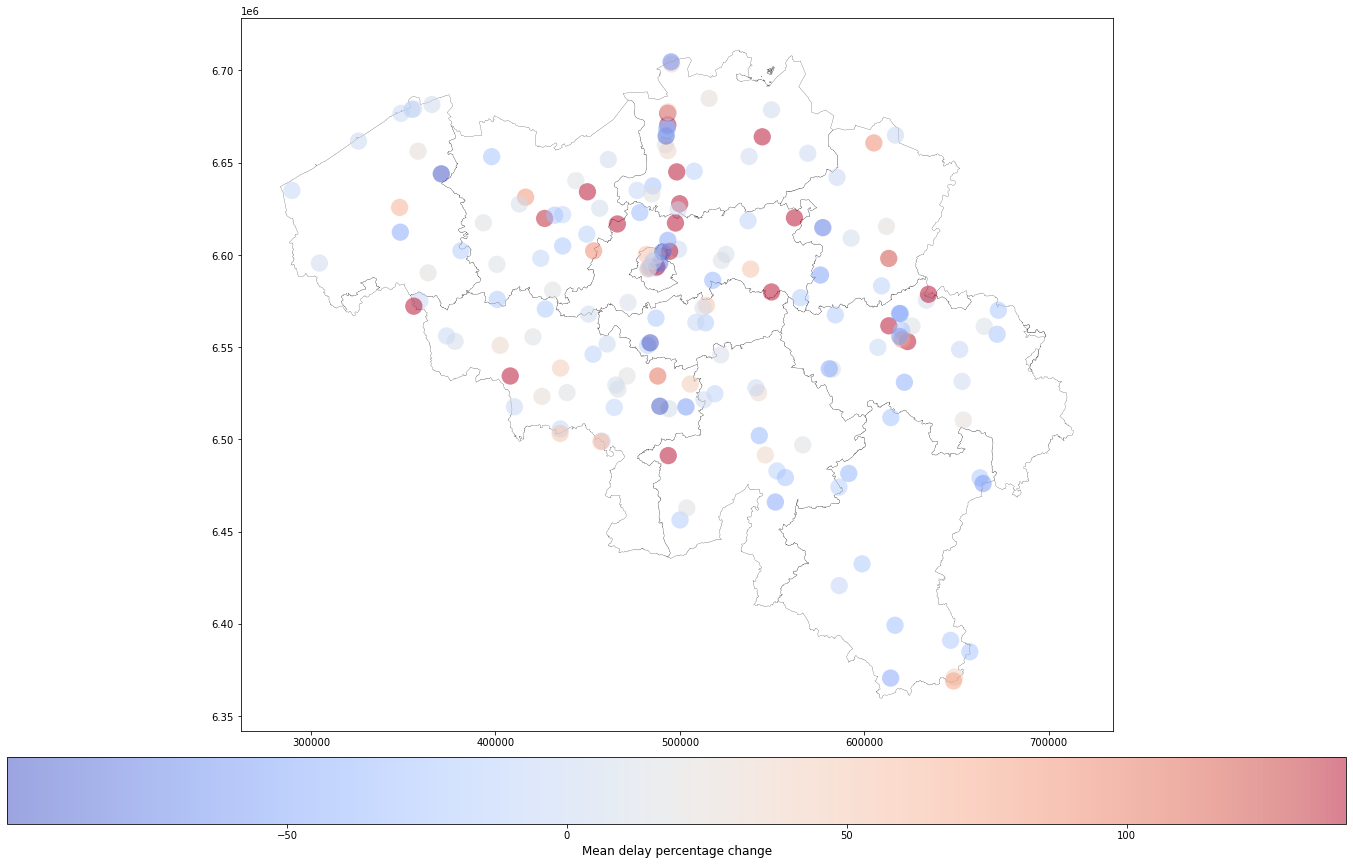

In [236]:
## get data from years we want to compare
compare_2022_2019 = ptcar_agg_both_2019.merge(ptcar_agg_both_2022, left_on = ['PTCAR_1pointage', 'PTCAR_2pointage'], right_on = ['PTCAR_1pointage', 'PTCAR_2pointage'], how = 'inner')
compare_2022_2019['mean_delay_pct_change'] = ((compare_2022_2019['mean_delay_y'] - compare_2022_2019['mean_delay_x']) / compare_2022_2019['mean_delay_x']) * 100



## make map
data_map_compare_2022_2019 = gpd.GeoDataFrame(compare_2022_2019, geometry=gpd.points_from_xy(compare_2022_2019.GPS_LONGITUDE_x, compare_2022_2019.GPS_LATITUDE_x))

#Set crs to belgium data
data_map_compare_2022_2019.crs = "EPSG:4326"
#Re-project geometries to a projected CRS 
data_map_compare_2022_2019 = data_map_compare_2022_2019.to_crs(epsg='3857')


# Truncate extreme changes
q3_mean_delay_pct_change, q1_mean_delay_pct_change = np.percentile(compare_2022_2019['mean_delay_pct_change'], [75 ,25])
iqr_mean_delay_pct_change = q3_mean_delay_pct_change - q1_mean_delay_pct_change
max_allowed_mean_delay_pct_change = np.median(compare_2022_2019['mean_delay_pct_change']) + 3 * iqr_mean_delay_pct_change
min_allowed_mean_delay_pct_change = np.median(compare_2022_2019['mean_delay_pct_change']) - 3 * iqr_mean_delay_pct_change
compare_2022_2019.loc[(compare_2022_2019['mean_delay_pct_change'] > max_allowed_mean_delay_pct_change), 'mean_delay_pct_change'] = max_allowed_mean_delay_pct_change
compare_2022_2019.loc[(compare_2022_2019['mean_delay_pct_change'] < min_allowed_mean_delay_pct_change), 'mean_delay_pct_change'] = min_allowed_mean_delay_pct_change

# Create colormap
cmap = plt.cm.get_cmap('coolwarm_r')

# Normalize color range
vmin = min(compare_2022_2019['mean_delay_pct_change'])
vmax = max(compare_2022_2019['mean_delay_pct_change'])
normalize = plt.Normalize(vmin=vmin, vmax=vmax)

# Map color range to colormap
colors = [cmap(normalize(value)) for value in compare_2022_2019['mean_delay_pct_change']]

# Init plot
fig, ax = plt.subplots(figsize=(24,16))

# Plot belgium map
p1 = belgium_provinces.plot(ax=ax, color='white', edgecolor='black', linewidth=0.2, zorder=1)

# Plot mean_delay per ptcar
sc = ax.scatter(data_map_compare_2022_2019.geometry.x, data_map_compare_2022_2019.geometry.y, c=compare_2022_2019['mean_delay_pct_change'], cmap='coolwarm', s=300, zorder=2, alpha=0.5, edgecolors='none')

# Add colorbar
cbar = fig.colorbar(sc, ax=ax, orientation='horizontal', pad=0.03)
cbar.ax.set_xlabel('Mean delay percentage change', fontsize=12)
cbar.ax.tick_params(labelsize=10)

In [307]:
# Now we make our groupby include NB, so we can take a look at differences
# 
# interested in the differences between 2019 and 2022 / 2023.

# Group by PTCAR and year
ptcar_agg_first_years_split = ptcar_merged.groupby(['PTCAR_1pointage', 'YEAR_DEP', 'GPS_LATITUDE', 'GPS_LONGITUDE', 'LONG_NAME_NL_x', 'NB']).agg(mean_delay=('Retard_1pointage', 'mean'),
                                                                                                                       sum=('Retard_1pointage', 'size'))\
                                                                                                                        .reset_index()
ptcar_agg_second_years_split = ptcar_merged.groupby(['PTCAR_2pointage', 'YEAR_DEP', 'GPS_LATITUDE', 'GPS_LONGITUDE', 'LONG_NAME_NL_y', 'NB']).agg(mean_delay=('Retard_2pointage', 'mean'),
                                                                                                                        sum=('Retard_2pointage', 'size'))\
                                                                                                                        .reset_index()
ptcar_agg_both_years_split = pd.concat([ptcar_agg_first_years_split, ptcar_agg_second_years_split]).reset_index().drop(columns='index')



# make partial 2019 table with only dates before last date-of-year we have in current 2023 table (april 12th)
last_2023_2019_equivalent_date = dt.datetime.strptime('2019-12-04', '%Y-%m-%d')
ptcar2019 = ptcar_merged[(ptcar_merged['YEAR_DEP'] == 2019) & (ptcar_merged['DAT_DEP'] <= last_2023_2019_equivalent_date)]

# Group by PTCAR
ptcar2019_agg_first_split = ptcar2019.groupby(['PTCAR_1pointage', 'GPS_LATITUDE', 'GPS_LONGITUDE', 'LONG_NAME_NL_x', 'NB']).agg(mean_delay=('Retard_1pointage', 'mean'),
                                                                                                                       sum=('Retard_1pointage', 'size'))\
                                                                                                                        .reset_index()
ptcar2019_agg_second_split = ptcar2019.groupby(['PTCAR_2pointage', 'GPS_LATITUDE', 'GPS_LONGITUDE', 'LONG_NAME_NL_y', 'NB']).agg(mean_delay=('Retard_2pointage', 'mean'),
                                                                                                                        sum=('Retard_2pointage', 'size'))\
                                                                                                                        .reset_index()
ptcar2019_agg_both_split = pd.concat([ptcar2019_agg_first_split, ptcar2019_agg_second_split]).reset_index().drop(columns='index')


ptcar_agg_both_2019_split = ptcar_agg_both_years_split[ptcar_agg_both_years_split['YEAR_DEP']==2019]
ptcar_agg_both_2019_partial_split = ptcar2019_agg_both_split # 2019 but only obs in part of the year that we have for 2023
ptcar_agg_both_2020_split = ptcar_agg_both_years_split[ptcar_agg_both_years_split['YEAR_DEP']==2020]
ptcar_agg_both_2021_split = ptcar_agg_both_years_split[ptcar_agg_both_years_split['YEAR_DEP']==2021]
ptcar_agg_both_2022_split = ptcar_agg_both_years_split[ptcar_agg_both_years_split['YEAR_DEP']==2022]
ptcar_agg_both_2023_split = ptcar_agg_both_years_split[ptcar_agg_both_years_split['YEAR_DEP']==2023] # incomplete, up to 12th of april

# check
ptcar_agg_both_2023_split[ptcar_agg_both_2023_split['PTCAR_1pointage']==13]


,PTCAR_1pointage,YEAR_DEP,GPS_LATITUDE,GPS_LONGITUDE,LONG_NAME_NL_x,NB,mean_delay,sum,PTCAR_2pointage,LONG_NAME_NL_y
26,13.0,2023,51.077288,2.602397,DE PANNE,1.0,242.983498,1212,NaN,NaN
27,13.0,2023,51.077288,2.602397,DE PANNE,2.0,172.869048,336,NaN,NaN


In [309]:
ptcar_agg_both_2023_split.columns

Index(['PTCAR_1pointage', 'YEAR_DEP', 'GPS_LATITUDE', 'GPS_LONGITUDE',
       'LONG_NAME_NL_x', 'NB', 'mean_delay', 'sum', 'PTCAR_2pointage',
       'LONG_NAME_NL_y'],
      dtype='object')

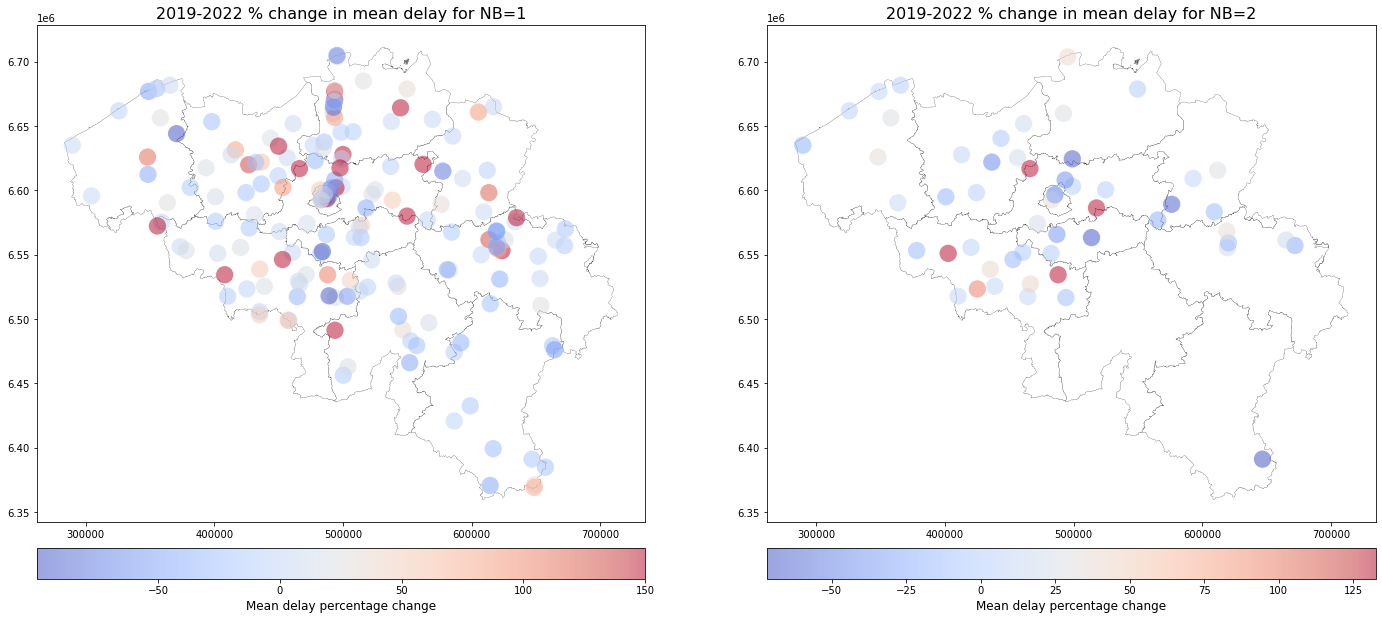

In [287]:
## get data from years we want to compare
compare_2022_2019_split = ptcar_agg_both_2019_split.merge(ptcar_agg_both_2022_split, left_on = ['PTCAR_1pointage', 'PTCAR_2pointage', 'NB'], right_on = ['PTCAR_1pointage', 'PTCAR_2pointage', 'NB'], how = 'inner')
compare_2022_2019_split['mean_delay_pct_change'] = ((compare_2022_2019_split['mean_delay_y'] - compare_2022_2019_split['mean_delay_x']) / compare_2022_2019_split['mean_delay_x']) * 100


# subplot comparison of PTCAR 1 for NB=1 ( NB=2 below)
compare_2022_2019_split_NB1 = compare_2022_2019_split[compare_2022_2019_split['NB']==1]

data_map_compare_2022_2019_split_NB1 = gpd.GeoDataFrame(compare_2022_2019_split_NB1, geometry=gpd.points_from_xy(compare_2022_2019_split_NB1.GPS_LONGITUDE_x, compare_2022_2019_split_NB1.GPS_LATITUDE_x))

#Set crs to belgium data
data_map_compare_2022_2019_split_NB1.crs = "EPSG:4326"
#Re-project geometries to a projected CRS 
data_map_compare_2022_2019_split_NB1 = data_map_compare_2022_2019_split_NB1.to_crs(epsg='3857')


# Truncate extreme changes
q3_mean_delay_pct_change, q1_mean_delay_pct_change = np.percentile(compare_2022_2019_split_NB1['mean_delay_pct_change'], [75 ,25])
iqr_mean_delay_pct_change = q3_mean_delay_pct_change - q1_mean_delay_pct_change
max_allowed_mean_delay_pct_change = np.median(compare_2022_2019_split_NB1['mean_delay_pct_change']) + 3 * iqr_mean_delay_pct_change
min_allowed_mean_delay_pct_change = np.median(compare_2022_2019_split_NB1['mean_delay_pct_change']) - 3 * iqr_mean_delay_pct_change
compare_2022_2019_split_NB1.loc[(compare_2022_2019_split_NB1['mean_delay_pct_change'] > max_allowed_mean_delay_pct_change), 'mean_delay_pct_change'] = max_allowed_mean_delay_pct_change
compare_2022_2019_split_NB1.loc[(compare_2022_2019_split_NB1['mean_delay_pct_change'] < min_allowed_mean_delay_pct_change), 'mean_delay_pct_change'] = min_allowed_mean_delay_pct_change

# Create colormap
cmap = plt.cm.get_cmap('coolwarm_r')

# Normalize color range
vmin = min(compare_2022_2019_split_NB1['mean_delay_pct_change'])
vmax = max(compare_2022_2019_split_NB1['mean_delay_pct_change'])
normalize = plt.Normalize(vmin=vmin, vmax=vmax)

# Map color range to colormap
colors = [cmap(normalize(value)) for value in compare_2022_2019_split_NB1['mean_delay_pct_change']]






# subplot comparison of PTCAR 1 for NB=2 ( NB=1 is above)
compare_2022_2019_split_NB2 = compare_2022_2019_split[compare_2022_2019_split['NB']==2]

data_map_compare_2022_2019_split_NB2 = gpd.GeoDataFrame(compare_2022_2019_split_NB2, geometry=gpd.points_from_xy(compare_2022_2019_split_NB2.GPS_LONGITUDE_x, compare_2022_2019_split_NB2.GPS_LATITUDE_x))

#Set crs to belgium data
data_map_compare_2022_2019_split_NB2.crs = "EPSG:4326"
#Re-project geometries to a projected CRS 
data_map_compare_2022_2019_split_NB2 = data_map_compare_2022_2019_split_NB2.to_crs(epsg='3857')


# Truncate extreme changes
q3_mean_delay_pct_change, q1_mean_delay_pct_change = np.percentile(compare_2022_2019_split_NB2['mean_delay_pct_change'], [75 ,25])
iqr_mean_delay_pct_change = q3_mean_delay_pct_change - q1_mean_delay_pct_change
max_allowed_mean_delay_pct_change = np.median(compare_2022_2019_split_NB2['mean_delay_pct_change']) + 3 * iqr_mean_delay_pct_change
min_allowed_mean_delay_pct_change = np.median(compare_2022_2019_split_NB2['mean_delay_pct_change']) - 3 * iqr_mean_delay_pct_change
compare_2022_2019_split_NB2.loc[(compare_2022_2019_split_NB2['mean_delay_pct_change'] > max_allowed_mean_delay_pct_change), 'mean_delay_pct_change'] = max_allowed_mean_delay_pct_change
compare_2022_2019_split_NB2.loc[(compare_2022_2019_split_NB2['mean_delay_pct_change'] < min_allowed_mean_delay_pct_change), 'mean_delay_pct_change'] = min_allowed_mean_delay_pct_change

# Create colormap
cmap = plt.cm.get_cmap('coolwarm_r')

# Normalize color range
vmin = min(compare_2022_2019_split_NB2['mean_delay_pct_change'])
vmax = max(compare_2022_2019_split_NB2['mean_delay_pct_change'])
normalize = plt.Normalize(vmin=vmin, vmax=vmax)





# Init plot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(24,16))

# Plot belgium map on both axes
p1 = belgium_provinces.plot(ax=ax1, color='white', edgecolor='black', linewidth=0.2, zorder=1)
p2 = belgium_provinces.plot(ax=ax2, color='white', edgecolor='black', linewidth=0.2, zorder=1)

# Plot mean_delay per ptcar NB=1 on first axis
sc1 = ax1.scatter(data_map_compare_2022_2019_split_NB1.geometry.x, data_map_compare_2022_2019_split_NB1.geometry.y, c=compare_2022_2019_split_NB1['mean_delay_pct_change'], cmap='coolwarm', s=300, zorder=2, alpha=0.5, edgecolors='none')
# Plot mean_delay per ptcar NB=2 on second axis
sc2 = ax2.scatter(data_map_compare_2022_2019_split_NB2.geometry.x, data_map_compare_2022_2019_split_NB2.geometry.y, c=compare_2022_2019_split_NB2['mean_delay_pct_change'], cmap='coolwarm', s=300, zorder=2, alpha=0.5, edgecolors='none')

# Add colorbars
cbar1 = fig.colorbar(sc1, ax=ax1, orientation='horizontal', pad=0.03)
cbar1.ax.set_xlabel('Mean delay percentage change', fontsize=12)
cbar1.ax.tick_params(labelsize=10)

cbar2 = fig.colorbar(sc2, ax=ax2, orientation='horizontal', pad=0.03)
cbar2.ax.set_xlabel('Mean delay percentage change', fontsize=12)
cbar2.ax.tick_params(labelsize=10)

# Set titles for subplots
ax1.set_title('2019-2022 % change in mean delay for NB=1', fontsize=16)
ax2.set_title('2019-2022 % change in mean delay for NB=2', fontsize=16)

# Set spacing between subplots
fig.subplots_adjust(wspace=0.2)

# Show the plot
plt.show()

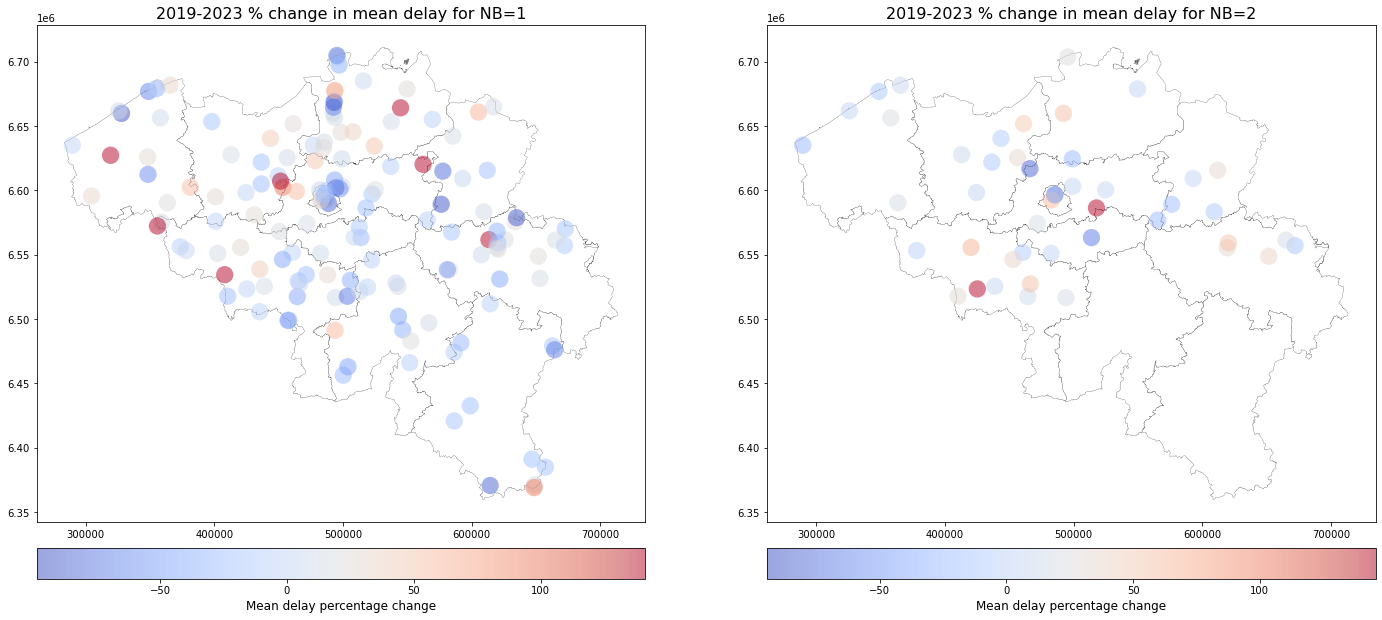

In [311]:
# Now let's take a look at 2023 compared to 2019
            # we limit the data from 2019 to be the same as the dates that we have of 2023
## get data from years we want to compare
compare_2023_2019_split = ptcar_agg_both_2019_partial_split.merge(ptcar_agg_both_2023_split, left_on = ['PTCAR_1pointage', 'PTCAR_2pointage', 'NB'], right_on = ['PTCAR_1pointage', 'PTCAR_2pointage', 'NB'], how = 'inner')
compare_2023_2019_split['mean_delay_pct_change'] = ((compare_2023_2019_split['mean_delay_y'] - compare_2023_2019_split['mean_delay_x']) / compare_2023_2019_split['mean_delay_x']) * 100


# subplot comparison of PTCAR 1 for NB=1 ( NB=2 below)
compare_2023_2019_split_NB1 = compare_2023_2019_split[compare_2023_2019_split['NB']==1]

data_map_compare_2023_2019_split_NB1 = gpd.GeoDataFrame(compare_2023_2019_split_NB1, geometry=gpd.points_from_xy(compare_2023_2019_split_NB1.GPS_LONGITUDE_x, compare_2023_2019_split_NB1.GPS_LATITUDE_x))

#Set crs to belgium data
data_map_compare_2023_2019_split_NB1.crs = "EPSG:4326"
#Re-project geometries to a projected CRS 
data_map_compare_2023_2019_split_NB1 = data_map_compare_2023_2019_split_NB1.to_crs(epsg='3857')


# Truncate extreme changes
q3_mean_delay_pct_change, q1_mean_delay_pct_change = np.percentile(compare_2023_2019_split_NB1['mean_delay_pct_change'], [75 ,25])
iqr_mean_delay_pct_change = q3_mean_delay_pct_change - q1_mean_delay_pct_change
max_allowed_mean_delay_pct_change = np.median(compare_2023_2019_split_NB1['mean_delay_pct_change']) + 3 * iqr_mean_delay_pct_change
min_allowed_mean_delay_pct_change = np.median(compare_2023_2019_split_NB1['mean_delay_pct_change']) - 3 * iqr_mean_delay_pct_change
compare_2023_2019_split_NB1.loc[(compare_2023_2019_split_NB1['mean_delay_pct_change'] > max_allowed_mean_delay_pct_change), 'mean_delay_pct_change'] = max_allowed_mean_delay_pct_change
compare_2023_2019_split_NB1.loc[(compare_2023_2019_split_NB1['mean_delay_pct_change'] < min_allowed_mean_delay_pct_change), 'mean_delay_pct_change'] = min_allowed_mean_delay_pct_change

# Create colormap
cmap = plt.cm.get_cmap('coolwarm_r')

# Normalize color range
vmin = min(compare_2023_2019_split_NB1['mean_delay_pct_change'])
vmax = max(compare_2023_2019_split_NB1['mean_delay_pct_change'])
normalize = plt.Normalize(vmin=vmin, vmax=vmax)

# Map color range to colormap
colors = [cmap(normalize(value)) for value in compare_2023_2019_split_NB1['mean_delay_pct_change']]



# subplot comparison of PTCAR 1 for NB=1 ( NB=2 below)
compare_2023_2019_split_NB2 = compare_2023_2019_split[compare_2023_2019_split['NB']==2]

data_map_compare_2023_2019_split_NB2 = gpd.GeoDataFrame(compare_2023_2019_split_NB2, geometry=gpd.points_from_xy(compare_2023_2019_split_NB2.GPS_LONGITUDE_x, compare_2023_2019_split_NB2.GPS_LATITUDE_x))

#Set crs to belgium data
data_map_compare_2023_2019_split_NB2.crs = "EPSG:4326"
#Re-project geometries to a projected CRS 
data_map_compare_2023_2019_split_NB2 = data_map_compare_2023_2019_split_NB2.to_crs(epsg='3857')

# Truncate extreme changes
q3_mean_delay_pct_change, q1_mean_delay_pct_change = np.percentile(compare_2023_2019_split_NB2['mean_delay_pct_change'], [75 ,25])
iqr_mean_delay_pct_change = q3_mean_delay_pct_change - q1_mean_delay_pct_change
max_allowed_mean_delay_pct_change = np.median(compare_2023_2019_split_NB2['mean_delay_pct_change']) + 3 * iqr_mean_delay_pct_change
min_allowed_mean_delay_pct_change = np.median(compare_2023_2019_split_NB2['mean_delay_pct_change']) - 3 * iqr_mean_delay_pct_change
compare_2023_2019_split_NB2.loc[(compare_2023_2019_split_NB2['mean_delay_pct_change'] > max_allowed_mean_delay_pct_change), 'mean_delay_pct_change'] = max_allowed_mean_delay_pct_change
compare_2023_2019_split_NB2.loc[(compare_2023_2019_split_NB2['mean_delay_pct_change'] < min_allowed_mean_delay_pct_change), 'mean_delay_pct_change'] = min_allowed_mean_delay_pct_change

# Create colormap
cmap = plt.cm.get_cmap('coolwarm_r')

# Normalize color range
vmin = min(compare_2023_2019_split_NB2['mean_delay_pct_change'])
vmax = max(compare_2023_2019_split_NB2['mean_delay_pct_change'])
normalize = plt.Normalize(vmin=vmin, vmax=vmax)

# Map color range to colormap
colors = [cmap(normalize(value)) for value in compare_2023_2019_split_NB2['mean_delay_pct_change']]





# Init plot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(24,16))

# Plot belgium map on both axes
p1 = belgium_provinces.plot(ax=ax1, color='white', edgecolor='black', linewidth=0.2, zorder=1)
p2 = belgium_provinces.plot(ax=ax2, color='white', edgecolor='black', linewidth=0.2, zorder=1)

# Plot mean_delay per ptcar NB=1 on first axis
sc1 = ax1.scatter(data_map_compare_2023_2019_split_NB1.geometry.x, data_map_compare_2023_2019_split_NB1.geometry.y, c=compare_2023_2019_split_NB1['mean_delay_pct_change'], cmap='coolwarm', s=300, zorder=2, alpha=0.5, edgecolors='none')
# Plot mean_delay per ptcar NB=2 on second axis
sc2 = ax2.scatter(data_map_compare_2023_2019_split_NB2.geometry.x, data_map_compare_2023_2019_split_NB2.geometry.y, c=compare_2023_2019_split_NB2['mean_delay_pct_change'], cmap='coolwarm', s=300, zorder=2, alpha=0.5, edgecolors='none')

# Add colorbars
cbar1 = fig.colorbar(sc1, ax=ax1, orientation='horizontal', pad=0.03)
cbar1.ax.set_xlabel('Mean delay percentage change', fontsize=12)
cbar1.ax.tick_params(labelsize=10)

cbar2 = fig.colorbar(sc2, ax=ax2, orientation='horizontal', pad=0.03)
cbar2.ax.set_xlabel('Mean delay percentage change', fontsize=12)
cbar2.ax.tick_params(labelsize=10)

# Set titles for subplots
ax1.set_title('2019-2023 % change in mean delay for NB=1', fontsize=16)
ax2.set_title('2019-2023 % change in mean delay for NB=2', fontsize=16)

# Set spacing between subplots
fig.subplots_adjust(wspace=0.2)

# Show the plot
plt.show()